# Task 1
## Standard and Poor's (S&P) 500 index prediction
### Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

### Read data into memory

In [12]:
data = pd.read_csv('sp500.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

### Correlate data

In [13]:
correlation_matrix = data.corr()

### Find Highest correlation
#### Method 1: Generate Heatmap
This is to get a visual representation for how the data is correlated.

This method will prove to be inefficient for data sets with a large number of headers. In this case, there

#### Method 2: Search Correlation Matrix For Desired Values
This method will return the column names that have the highest correlation with SP500.

For the sake of this task, we will only get the correlations between 1.0 and 0.95 as well as between -0.95 and -1.0.

METHOD # 1 
 HEATMAP


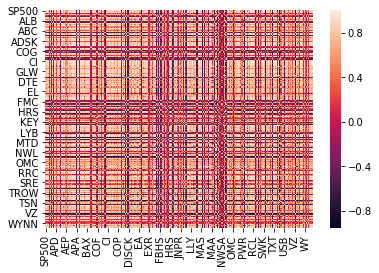

METHOD # 2 
 SEARCH
  71 columns found!


In [14]:
print('METHOD # 1 \n HEATMAP')
sns.heatmap(correlation_matrix)
plt.show()

print('METHOD # 2 \n SEARCH')
sp_correlations = np.array(correlation_matrix[['SP500']])[1:]
correlation_indices = np.union1d(np.where(sp_correlations >= 0.95), np.where(sp_correlations <= -0.95))
print("  " + str(correlation_indices.size - 1) + " columns found!")

### Extract the Desired Dataset
Get the desired data from the larger dataset, and split it into three smaller sets. One for training, one for testing and one for validation with the ratios 8:1:1 repectively.

Normalize the data using sklearns's scale function.

In [15]:
desired_data = data.iloc[:, correlation_indices]

input_set  = preprocessing.scale(desired_data.drop(['SP500'], axis = 1))
output_set = preprocessing.scale(desired_data[['SP500']])

train_ratio = 0.8
test_ratio  = 0.1
valid_ratio = 0.1

training_input    = input_set[:int(train_ratio * input_set.shape[0])]
training_target   = output_set[:int(train_ratio * input_set.shape[0])]
testing_input     = input_set[int(train_ratio * input_set.shape[0]):int((train_ratio + test_ratio) * input_set.shape[0])]
testing_target    = output_set[int(train_ratio * input_set.shape[0]):int((train_ratio + test_ratio) * input_set.shape[0])]
validation_input  = input_set[int((train_ratio + test_ratio) * input_set.shape[0]):]
validation_target = output_set[int((train_ratio + test_ratio) * input_set.shape[0]):]

### Create the Linear regressor
Two multilayer perceptrons. One using a stochastic gradient descent optimizer, and the other using an adam optimizer.

Other than the optimizer, all other parameters will remain consistent.

In [8]:
hidden_layer        = (512, 512, 512)
regularization_rate = 0.00001
learning_rate_init  = 0.01
learning_rate_mode  = 'adaptive'
batch_size          = 128
tolerance           = 1e-6
max_iteration       = 1000
no_change_tolerance = 10


model_adm = MLPClassifier(hidden_layer_sizes=hidden_layer, solver='adam')
model_sgd = MLPClassifier(solver='sgd')

### Give the model the training data

### Get Test results